# EDA

In [495]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [546]:
df = pd.read_excel('clean_political_dataset.xlsx' )

In [547]:
df.head()

,_Location_latitude,_Location_longitude,Age,Gender,Marital Status,children,Education Level,Employment Status,Monthly Household Income,vote,...,other_reason_no_vote,vote_next,local_issues,other_issues,political_interest,political_information,other_source,political_volunteer,Area,County
0,0.336606,37.564123,20-29,Female,Single,0.0,Tertiary,Student,Less than 10000,Yes,...,NaN,Very likely,"Jobs/Employment, Crime and Safety, Environment...",NaN,Interested,"TV News, Social Media, Online News Websites",NaN,Yes,Isiolo Central,Isiolo
1,-1.153349,36.916207,20-29,Male,Single,NaN,Tertiary,Unemployed,Less than 10000,No,...,NaN,Not sure,"Jobs/Employment, Affordable Housing, Crime and...",NaN,Slightly interested,Online News Websites,NaN,No,Ruiru,Kiambu
2,-1.254793,36.900190,20-29,Male,Single,0.0,Tertiary,Student,10001-20000,No,...,NaN,Not sure,"Jobs/Employment, Crime and Safety, Transportat...",NaN,Slightly interested,"TV News, Social Media, Radio",NaN,No,Embu,Embu
3,-2.629627,38.118504,20-29,Male,Single,0.0,Tertiary,Student,Less than 10000,Yes,...,NaN,Very likely,"Education, Jobs/Employment, Crime and Safety",NaN,Slightly interested,Social Media,NaN,No,Makueni,Makueni
4,-1.086333,37.064720,60,Male,Married,3.0,Tertiary,Employed,60k+,Yes,...,NaN,Not sure,"Jobs/Employment, Crime and Safety, Social Just...",NaN,Slightly interested,"TV News, Social Media, Radio",NaN,No,Juja,Kiambu


In [548]:
df.dtypes

_Location_latitude          float64
_Location_longitude         float64
Age                          object
Gender                       object
Marital Status               object
children                    float64
Education Level              object
Employment Status            object
Monthly Household Income     object
vote                         object
reason_no_vote               object
other_reason_no_vote         object
vote_next                    object
local_issues                 object
other_issues                 object
political_interest           object
political_information        object
other_source                 object
political_volunteer          object
Area                         object
County                       object
dtype: object

In [549]:
df.describe()

,_Location_latitude,_Location_longitude,children
count,4330.000000,4330.000000,3784.000000
mean,-0.812576,36.642304,2.287526
std,1.193930,1.722108,2.032980
min,-4.051778,-6.350630,0.000000
25%,-1.261322,36.127302,1.000000
50%,-0.802269,36.829522,2.000000
75%,-0.413183,37.132837,3.000000
max,25.496265,39.701942,17.000000


In [550]:
df.columns

Index(['_Location_latitude', '_Location_longitude', 'Age', 'Gender',
       'Marital Status', 'children', 'Education Level', 'Employment Status',
       'Monthly Household Income', 'vote', 'reason_no_vote',
       'other_reason_no_vote', 'vote_next', 'local_issues', 'other_issues',
       'political_interest', 'political_information', 'other_source',
       'political_volunteer', 'Area', 'County'],
      dtype='object')

Male      2337
Female    1993
Name: Gender, dtype: int64


<AxesSubplot:xlabel='Gender', ylabel='count'>

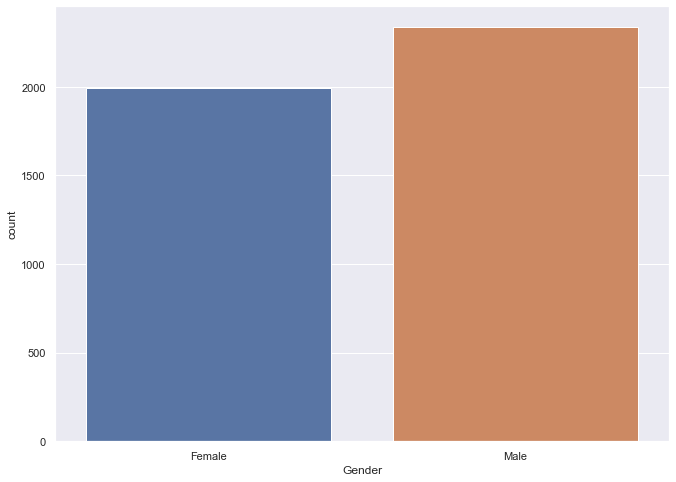

In [551]:
# Gender Distribution
print(df['Gender'].value_counts())
sns.set(style="darkgrid")
plt.figure(figsize=(11, 8)) 


sns.countplot(x ='Gender', data =df)

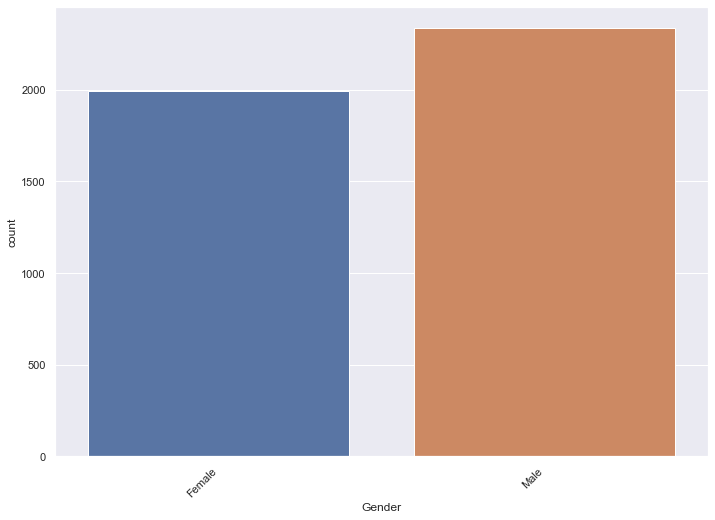

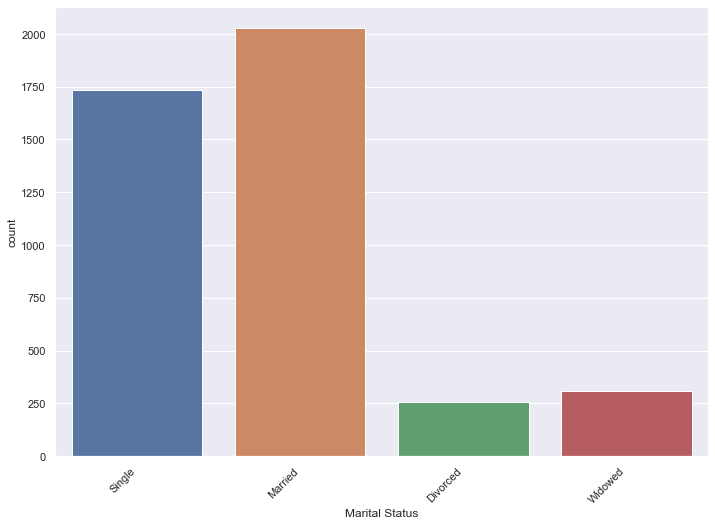

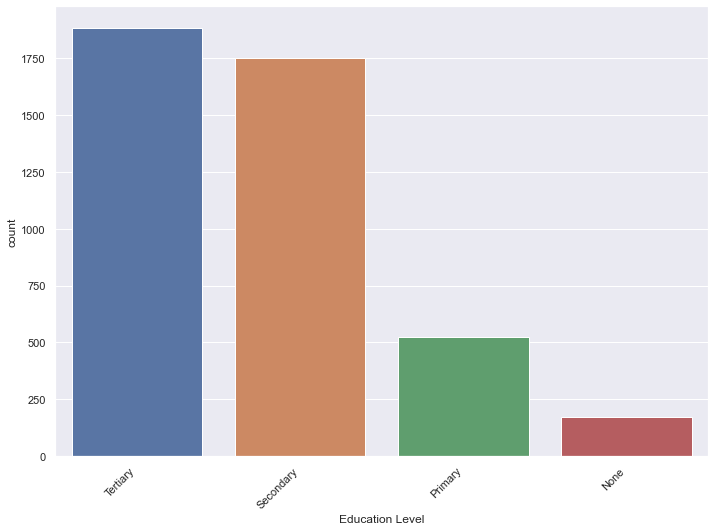

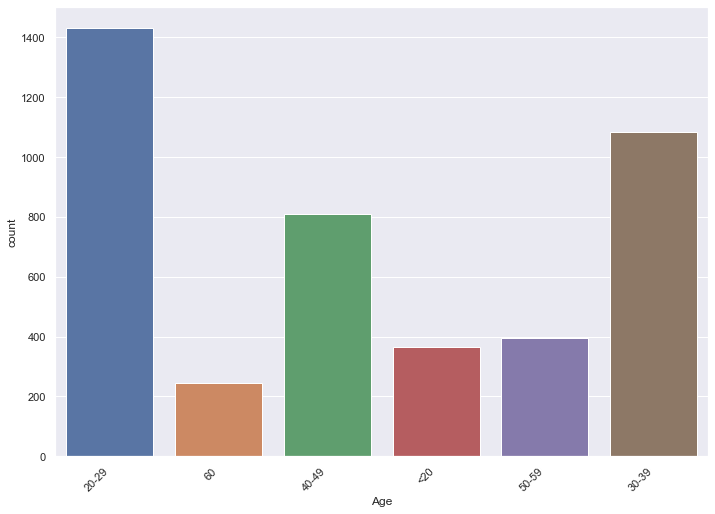

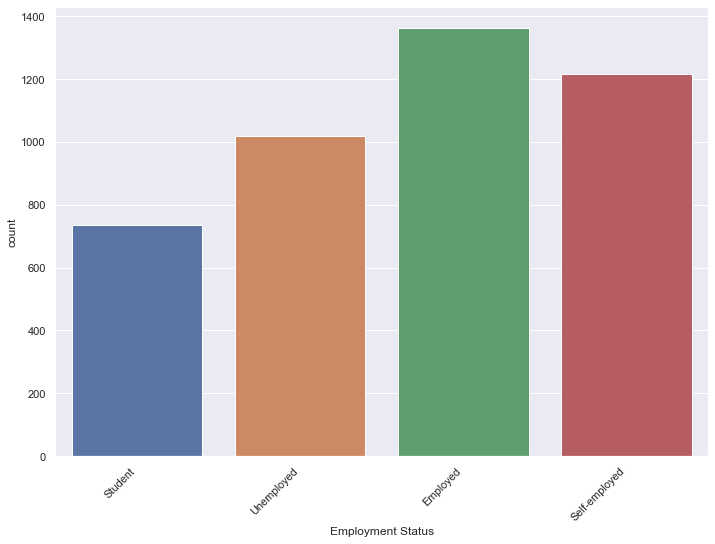

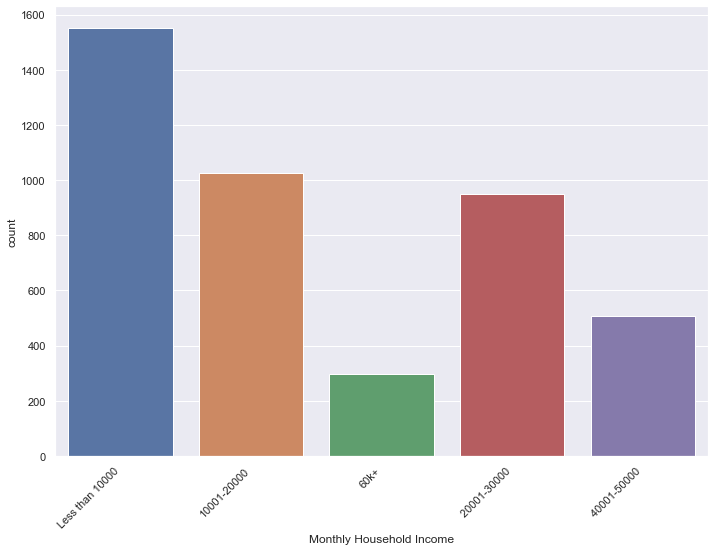

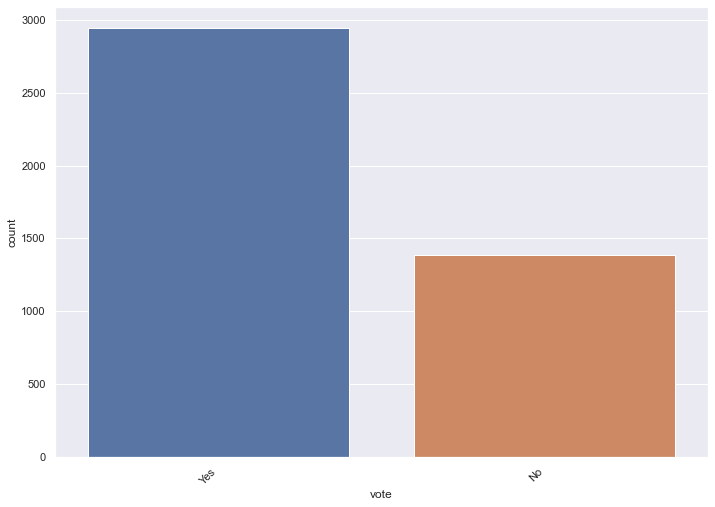

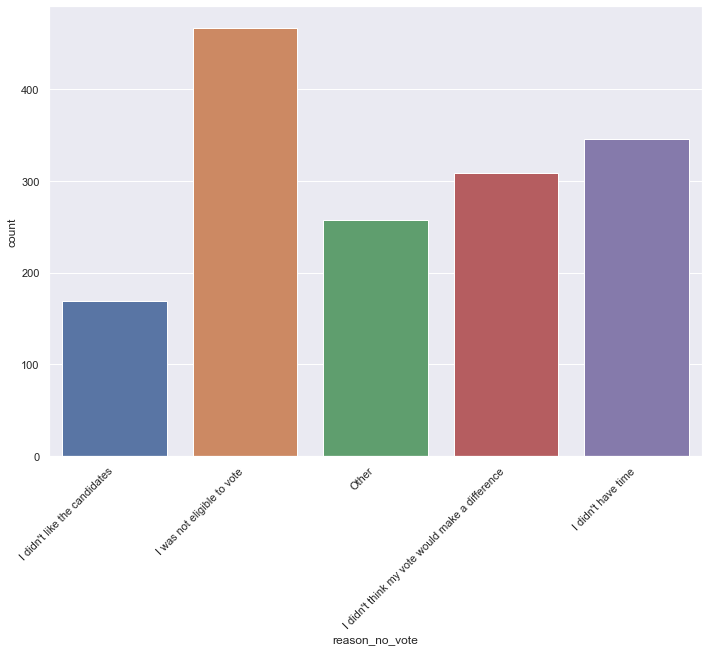

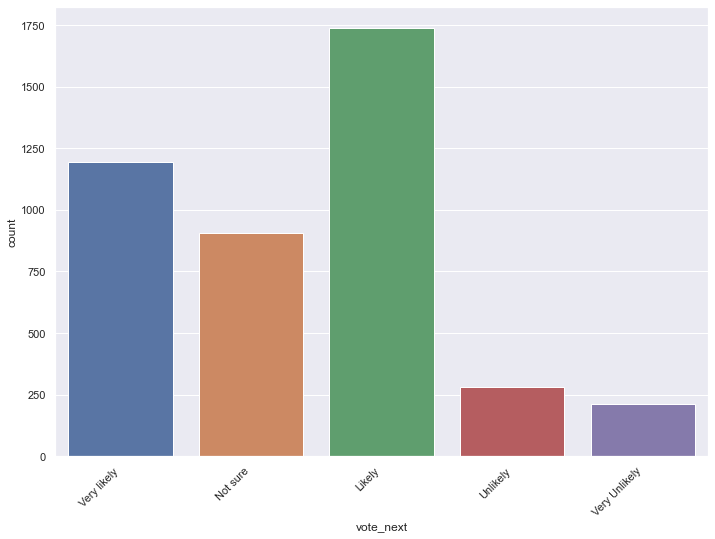

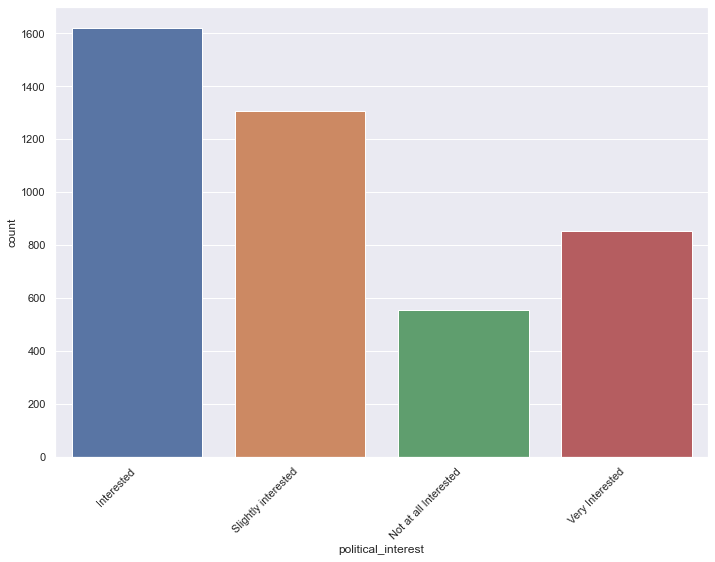

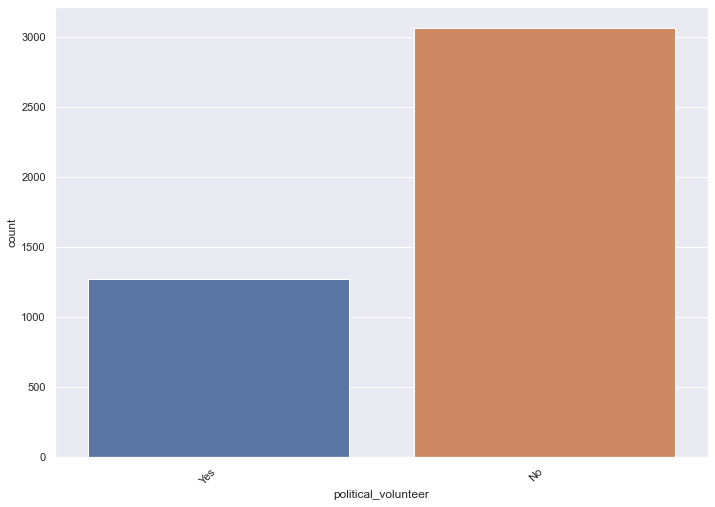

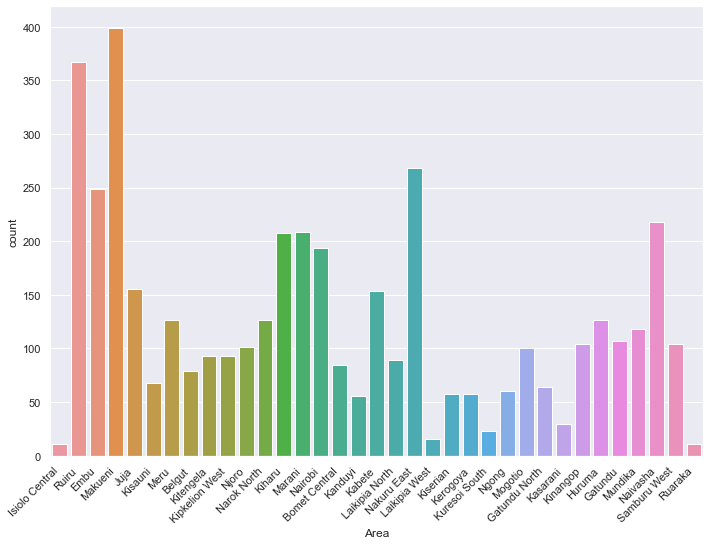

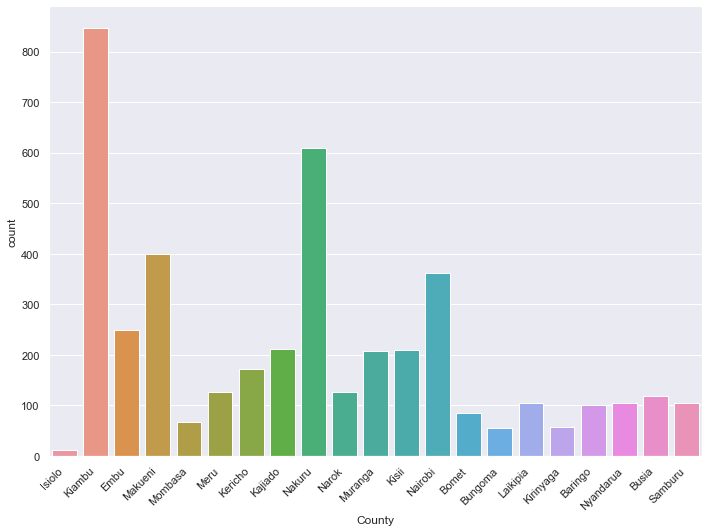

<Figure size 842.4x595.44 with 0 Axes>

In [592]:
def generate_countplots(data, columns):
    for column in columns:
        
        
        
        # Create a countplot for the column
        ax = sns.countplot(x=column, data=data)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
        plt.show() # Display the plot
        plt.tight_layout()
        
        
#         # Run percentage_finder() for the column
#         print(percentage_finder(data[column]))


columns = ['Gender', 'Marital Status', 'Education Level', 'Age',
       'Employment Status', 'Monthly Household Income', 'vote', 'reason_no_vote', 'vote_next',
        'political_interest', 'political_volunteer', 'Area', 'County']
generate_countplots(df, columns)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='children', ylabel='count'>

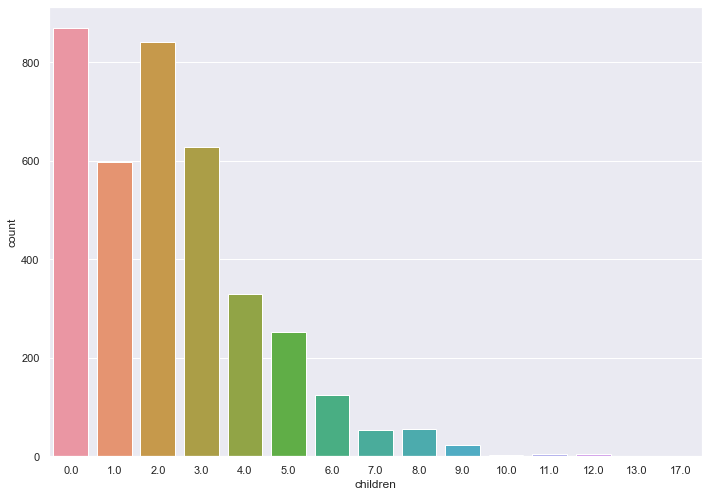

In [559]:
sns.countplot(df['children'])

In [552]:
df[df['Age'] != '<20']['vote']

0       Yes
1        No
2        No
3       Yes
4       Yes
       ... 
4325    Yes
4326    Yes
4327    Yes
4328    Yes
4329    Yes
Name: vote, Length: 3965, dtype: object

In [553]:
def percentage_finder(data):
    a = [item for item in data]
    b = []
    for items in a:
        items = str(items) + ','
        b.append(items)
    sources = ''.join(map(str, b))
    sources_list = sources.split(',')
    income_src = pd.Series(sources_list).value_counts()
    if 'nan' in income_src:
        income_src = income_src.drop('nan').drop('')
    else:
         income_src = income_src.drop('')
    income_src = pd.DataFrame(income_src)
    income_src['Percentage'] = np.round(income_src[0]/ income_src[0].sum() * 100, 2)
    return income_src
    

In [554]:
percentage_finder(df['vote'])

,0,Percentage
Yes,2942,67.94
No,1388,32.06


In [555]:
percentage_finder(df[df['Age'] != '<20']['vote'])

,0,Percentage
Yes,2884,72.74
No,1081,27.26


In [558]:
percentage_finder(df[df['reason_no_vote'] != 'I was not eligible to vote']['vote'])

,0,Percentage
Yes,2929,75.82
No,934,24.18


In [560]:
df.columns

Index(['_Location_latitude', '_Location_longitude', 'Age', 'Gender',
       'Marital Status', 'children', 'Education Level', 'Employment Status',
       'Monthly Household Income', 'vote', 'reason_no_vote',
       'other_reason_no_vote', 'vote_next', 'local_issues', 'other_issues',
       'political_interest', 'political_information', 'other_source',
       'political_volunteer', 'Area', 'County'],
      dtype='object')

In [566]:
df['County'].nunique()

21

### Local Issues

In [564]:
df['local_issues'].head(10)

0    Jobs/Employment, Crime and Safety, Environment...
1    Jobs/Employment, Affordable Housing, Crime and...
2    Jobs/Employment, Crime and Safety, Transportat...
3         Education, Jobs/Employment, Crime and Safety
4    Jobs/Employment, Crime and Safety, Social Just...
5    Jobs/Employment, Healthcare, Crime and Safety,...
6    Taxes, Crime and Safety, Jobs/Employment, Heal...
7    Taxes, Social Justice/Equality, Environment/Cl...
8                        Transportation/Infrastructure
9                   Jobs/Employment, Taxes, Healthcare
Name: local_issues, dtype: object

In [458]:
def add_comma_to_options2(column):
    pattern = r"(?:Education|Healthcare|Jobs/Employment|Affordable Housing|Crime and Safety|Transportation/Infrastructure|Environment/Climate Change|Taxes|Social Justice/Equality|Other \(Please specify\))"
    matches = re.finditer(pattern, str(column))
    options = [match.group() for match in matches]
    result = ", ".join(options)
    return result

In [459]:
df['local_issues'] = df['local_issues'].astype(str).apply(add_comma_to_options2)

In [334]:
df.columns

Index(['Enrollment Number', '_Location_latitude', '_Location_longitude', 'Age',
       'Gender', 'Marital Status', 'children', 'Education Level',
       'Employment Status', 'Monthly Household Income', 'vote',
       'reason_no_vote', 'other_reason_no_vote', 'vote_next', 'local_issues',
       'other_issues', 'political_interest', 'political_information',
       'other_source', 'political_volunteer', 'Area', 'County'],
      dtype='object')

In [584]:
percentage_finder(df['local_issues'])

,0,Percentage
Jobs/Employment,2021,13.03
Education,1767,11.39
Healthcare,1720,11.09
Taxes,1583,10.20
Crime and Safety,1379,8.89
Transportation/Infrastructure,1272,8.20
Affordable Housing,1054,6.79
Social Justice/Equality,938,6.05
Jobs/Employment,776,5.00
Environment/Climate Change,722,4.65


In [585]:
df.dtypes

_Location_latitude          float64
_Location_longitude         float64
Age                          object
Gender                       object
Marital Status               object
children                    float64
Education Level              object
Employment Status            object
Monthly Household Income     object
vote                         object
reason_no_vote               object
other_reason_no_vote         object
vote_next                    object
local_issues                 object
other_issues                 object
political_interest           object
political_information        object
other_source                 object
political_volunteer          object
Area                         object
County                       object
dtype: object

In [586]:
df.head()

,_Location_latitude,_Location_longitude,Age,Gender,Marital Status,children,Education Level,Employment Status,Monthly Household Income,vote,...,other_reason_no_vote,vote_next,local_issues,other_issues,political_interest,political_information,other_source,political_volunteer,Area,County
0,0.336606,37.564123,20-29,Female,Single,0.0,Tertiary,Student,Less than 10000,Yes,...,NaN,Very likely,"Jobs/Employment, Crime and Safety, Environment...",NaN,Interested,"TV News, Social Media, Online News Websites",NaN,Yes,Isiolo Central,Isiolo
1,-1.153349,36.916207,20-29,Male,Single,NaN,Tertiary,Unemployed,Less than 10000,No,...,NaN,Not sure,"Jobs/Employment, Affordable Housing, Crime and...",NaN,Slightly interested,Online News Websites,NaN,No,Ruiru,Kiambu
2,-1.254793,36.900190,20-29,Male,Single,0.0,Tertiary,Student,10001-20000,No,...,NaN,Not sure,"Jobs/Employment, Crime and Safety, Transportat...",NaN,Slightly interested,"TV News, Social Media, Radio",NaN,No,Embu,Embu
3,-2.629627,38.118504,20-29,Male,Single,0.0,Tertiary,Student,Less than 10000,Yes,...,NaN,Very likely,"Education, Jobs/Employment, Crime and Safety",NaN,Slightly interested,Social Media,NaN,No,Makueni,Makueni
4,-1.086333,37.064720,60,Male,Married,3.0,Tertiary,Employed,60k+,Yes,...,NaN,Not sure,"Jobs/Employment, Crime and Safety, Social Just...",NaN,Slightly interested,"TV News, Social Media, Radio",NaN,No,Juja,Kiambu


In [589]:
def percentage_finder2(data):
    sources_list = []
    for items in data:
        if pd.notnull(items) and not isinstance(items, float):
            sources = items.split(', ')
            sources_list.extend(sources)
    income_src = pd.Series(sources_list).value_counts()
    if 'nan' in income_src:
        income_src = income_src.drop('nan').drop('', errors='ignore')
    else:
        income_src = income_src.drop('', errors='ignore')
    income_src = pd.DataFrame(income_src)
    income_src.columns = ['Count']
    income_src['Percentage'] = np.round(income_src['Count'] / income_src['Count'].sum() * 100, 2)
    return income_src


In [590]:
percentage_finder2(df['local_issues'])

,Count,Percentage
Jobs/Employment,2797,18.03
Healthcare,2427,15.64
Education,2293,14.78
Taxes,2067,13.32
Crime and Safety,1554,10.02
Transportation/Infrastructure,1437,9.26
Affordable Housing,1145,7.38
Social Justice/Equality,1031,6.64
Environment/Climate Change,765,4.93


### Political Information

In [591]:
percentage_finder2(df['political_information'])

,Count,Percentage
TV News,3415,34.91
Social Media,2536,25.93
Radio,2040,20.86
Online News Websites,978,10.00
Print Newspapers,812,8.30


In [366]:
df.columns

Index(['Enrollment Number', '_Location_latitude', '_Location_longitude', 'Age',
       'Gender', 'Marital Status', 'children', 'Education Level',
       'Employment Status', 'Monthly Household Income', 'vote',
       'reason_no_vote', 'other_reason_no_vote', 'vote_next', 'local_issues',
       'other_issues', 'political_interest', 'political_information',
       'other_source', 'political_volunteer', 'Area', 'County'],
      dtype='object')

### VOTE NEXT

About 11% of the people who voted were likely on highly unlikely to vote in the next election with 21% unsure. Only 66% were mostly voting in the next election will vote in the next election.

### Cramer V

If the value of Cramér's V is close to 0, it indicates a weak association or no association between the variables.
If the value of Cramér's V is close to 1, it suggests a strong association between the variables.

### Employment VS Voting

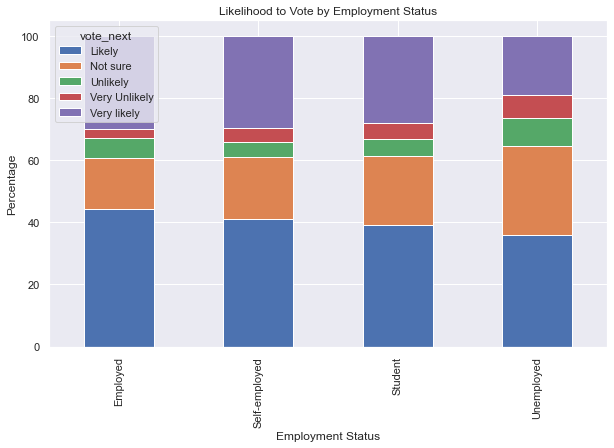

In [369]:
cross_tab = pd.crosstab(df['Employment Status'], df['vote_next'])

# Calculate the percentage of each likelihood category within each employment status group
cross_tab_percent = cross_tab.apply(lambda x: x / x.sum() * 100, axis=1)

# Plot the cross-tabulation as a stacked bar chart
cross_tab_percent.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set plot labels and title
plt.xlabel('Employment Status')
plt.ylabel('Percentage')
plt.title('Likelihood to Vote by Employment Status')

# Show the plot
plt.show()

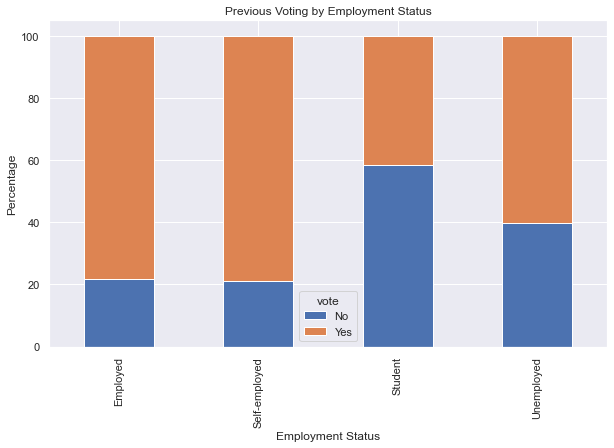

In [472]:
cross_tab = pd.crosstab(df['Employment Status'], df['vote'])

# Calculate the percentage of each likelihood category within each employment status group
cross_tab_percent = cross_tab.apply(lambda x: x / x.sum() * 100, axis=1)

# Plot the cross-tabulation as a stacked bar chart
cross_tab_percent.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set plot labels and title
plt.xlabel('Employment Status')
plt.ylabel('Percentage')
plt.title('Previous Voting by Employment Status')

# Show the plot
plt.show()

In [476]:
from scipy.stats import chi2_contingency

# Assuming your data is stored in a DataFrame called 'df'

# Select the two categorical columns to correlate
column1 = 'Employment Status'
column2 = 'vote_next'

# Create a contingency table of the two columns
contingency_table = pd.crosstab(df[column1], df[column2])

# Calculate the chi-square statistic and p-value
chi2, _, _, _ = chi2_contingency(contingency_table)

# Calculate the number of observations
n = len(df)

# Calculate Cramér's V
v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

# Print the correlation coefficient (Cramér's V)
print("Cramér's V:", v)

Cramér's V: 0.10103600839482159


In [477]:
from scipy.stats import chi2_contingency

# Assuming your data is stored in a DataFrame called 'df'

# Select the two categorical columns to correlate
column1 = 'Employment Status'
column2 = 'vote'

# Create a contingency table of the two columns
contingency_table = pd.crosstab(df[column1], df[column2])

# Calculate the chi-square statistic and p-value
chi2, _, _, _ = chi2_contingency(contingency_table)

# Calculate the number of observations
n = len(df)

# Calculate Cramér's V
v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

# Print the correlation coefficient (Cramér's V)
print("Cramér's V:", v)

Cramér's V: 0.3017752421590298


The Student and Unemployed are ones who are the most unsure of if they would vote or not in the next election. 

### Marital Status VS Voting

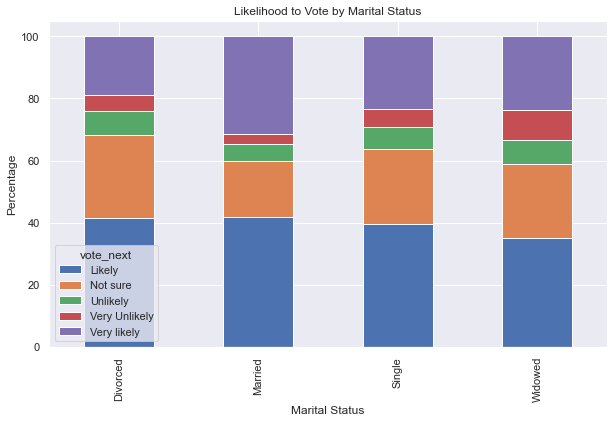

In [391]:
cross_tab_marital = pd.crosstab(df['Marital Status'], df['vote_next'])

# Calculate the percentage of each likelihood category within each employment status group
cross_tab_percent = cross_tab_marital.apply(lambda x: x / x.sum() * 100, axis=1)

# Plot the cross-tabulation as a stacked bar chart
cross_tab_percent.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set plot labels and title
plt.xlabel('Marital Status')
plt.ylabel('Percentage')
plt.title('Likelihood to Vote by Marital Status')

# Show the plot
plt.show()

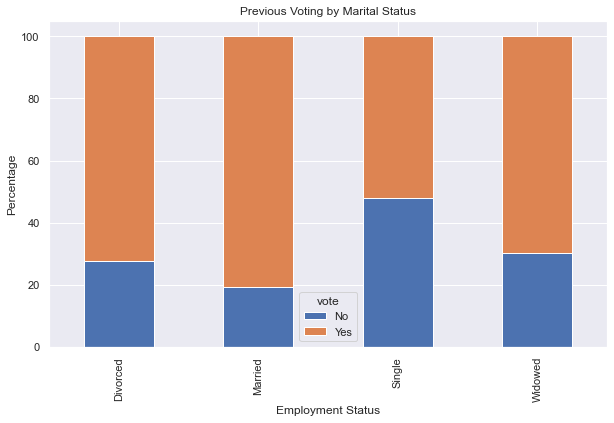

In [478]:
cross_tab_marital = pd.crosstab(df['Marital Status'], df['vote'])

# Calculate the percentage of each likelihood category within each employment status group
cross_tab_percent = cross_tab_marital.apply(lambda x: x / x.sum() * 100, axis=1)

# Plot the cross-tabulation as a stacked bar chart
cross_tab_percent.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set plot labels and title
plt.xlabel('Employment Status')
plt.ylabel('Percentage')
plt.title('Previous Voting by Marital Status')

# Show the plot
plt.show()

In [480]:
from scipy.stats import chi2_contingency

# Assuming your data is stored in a DataFrame called 'df'

# Select the two categorical columns to correlate
column1 = 'Marital Status'
column2 = 'vote_next'

# Create a contingency table of the two columns
contingency_table = pd.crosstab(df[column1], df[column2])

# Calculate the chi-square statistic and p-value
chi2, _, _, _ = chi2_contingency(contingency_table)

# Calculate the number of observations
n = len(df)

# Calculate Cramér's V
v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

# Print the correlation coefficient (Cramér's V)
print("Cramér's V:", v)

Cramér's V: 0.08569549313716233


In [481]:
from scipy.stats import chi2_contingency

# Assuming your data is stored in a DataFrame called 'df'

# Select the two categorical columns to correlate
column1 = 'Employment Status'
column2 = 'vote'

# Create a contingency table of the two columns
contingency_table = pd.crosstab(df[column1], df[column2])

# Calculate the chi-square statistic and p-value
chi2, _, _, _ = chi2_contingency(contingency_table)

# Calculate the number of observations
n = len(df)

# Calculate Cramér's V
v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

# Print the correlation coefficient (Cramér's V)
print("Cramér's V:", v)

Cramér's V: 0.3017752421590298


### Number of Children Vs Voting

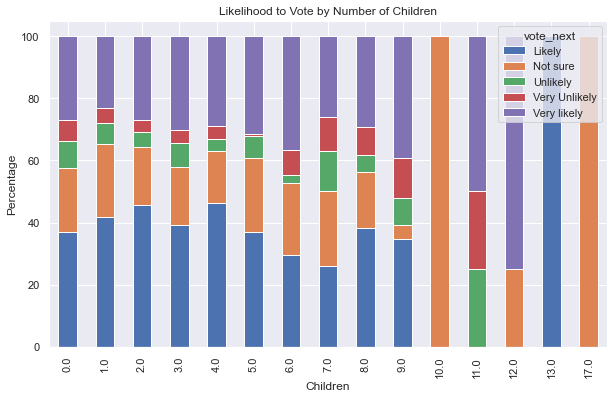

In [392]:
cross_tab_marital = pd.crosstab(df['children'], df['vote_next'])

# Calculate the percentage of each likelihood category within each employment status group
cross_tab_percent = cross_tab_marital.apply(lambda x: x / x.sum() * 100, axis=1)

# Plot the cross-tabulation as a stacked bar chart
cross_tab_percent.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set plot labels and title
plt.xlabel('Children')
plt.ylabel('Percentage')
plt.title('Likelihood to Vote by Number of Children')

# Show the plot
plt.show()

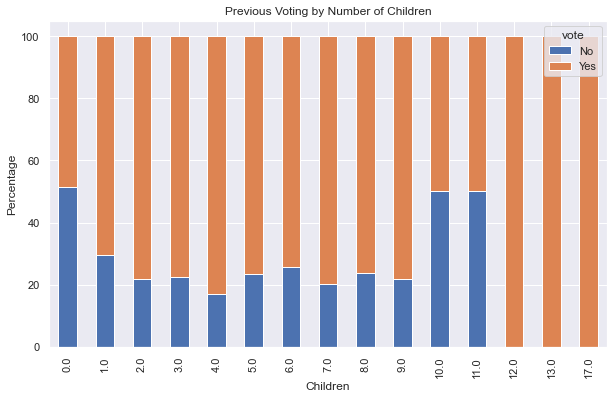

In [483]:
cross_tab_marital = pd.crosstab(df['children'], df['vote'])

# Calculate the percentage of each likelihood category within each employment status group
cross_tab_percent = cross_tab_marital.apply(lambda x: x / x.sum() * 100, axis=1)

# Plot the cross-tabulation as a stacked bar chart
cross_tab_percent.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set plot labels and title
plt.xlabel('Children')
plt.ylabel('Percentage')
plt.title('Previous Voting by Number of Children')

# Show the plot
plt.show()

In [485]:
from scipy.stats import chi2_contingency

# Assuming your data is stored in a DataFrame called 'df'

# Select the two categorical columns to correlate
column1 = 'children'
column2 = 'vote_next'

# Create a contingency table of the two columns
contingency_table = pd.crosstab(df[column1], df[column2])

# Calculate the chi-square statistic and p-value
chi2, _, _, _ = chi2_contingency(contingency_table)

# Calculate the number of observations
n = len(df)

# Calculate Cramér's V
v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

# Print the correlation coefficient (Cramér's V)
print("Cramér's V:", v)

Cramér's V: 0.0828406697192855


In [486]:
from scipy.stats import chi2_contingency

# Assuming your data is stored in a DataFrame called 'df'

# Select the two categorical columns to correlate
column1 = 'children'
column2 = 'vote'

# Create a contingency table of the two columns
contingency_table = pd.crosstab(df[column1], df[column2])

# Calculate the chi-square statistic and p-value
chi2, _, _, _ = chi2_contingency(contingency_table)

# Calculate the number of observations
n = len(df)

# Calculate Cramér's V
v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

# Print the correlation coefficient (Cramér's V)
print("Cramér's V:", v)

Cramér's V: 0.2526960808142518


### County VS Voting

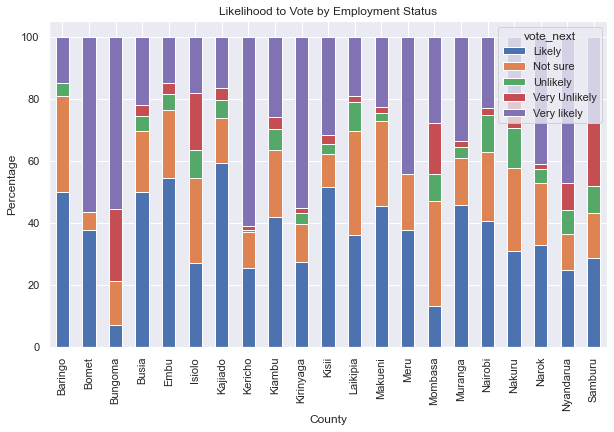

In [400]:
cross_tab_marital = pd.crosstab(df['County'], df['vote_next'])

# Calculate the percentage of each likelihood category within each employment status group
cross_tab_percent = cross_tab_marital.apply(lambda x: x / x.sum() * 100, axis=1)

# Plot the cross-tabulation as a stacked bar chart
cross_tab_percent.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set plot labels and title
plt.xlabel('County')
plt.ylabel('Percentage')
plt.title('Likelihood to Vote by Employment Status')

# Show the plot
plt.show()

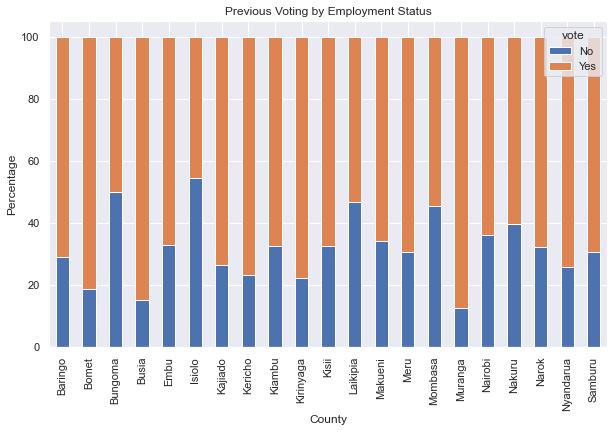

In [399]:
cross_tab_marital = pd.crosstab(df['County'], df['vote'])

# Calculate the percentage of each likelihood category within each employment status group
cross_tab_percent = cross_tab_marital.apply(lambda x: x / x.sum() * 100, axis=1)

# Plot the cross-tabulation as a stacked bar chart
cross_tab_percent.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set plot labels and title
plt.xlabel('County')
plt.ylabel('Percentage')
plt.title('Previous Voting by Employment Status')

# Show the plot
plt.show()

In [488]:
from scipy.stats import chi2_contingency

# Assuming your data is stored in a DataFrame called 'df'

# Select the two categorical columns to correlate
column1 = 'County'
column2 = 'vote_next'

# Create a contingency table of the two columns
contingency_table = pd.crosstab(df[column1], df[column2])

# Calculate the chi-square statistic and p-value
chi2, _, _, _ = chi2_contingency(contingency_table)

# Calculate the number of observations
n = len(df)

# Calculate Cramér's V
v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

# Print the correlation coefficient (Cramér's V)
print("Cramér's V:", v)

Cramér's V: 0.20542999823144265


In [489]:
from scipy.stats import chi2_contingency

# Assuming your data is stored in a DataFrame called 'df'

# Select the two categorical columns to correlate
column1 = 'County'
column2 = 'vote'

# Create a contingency table of the two columns
contingency_table = pd.crosstab(df[column1], df[column2])

# Calculate the chi-square statistic and p-value
chi2, _, _, _ = chi2_contingency(contingency_table)

# Calculate the number of observations
n = len(df)

# Calculate Cramér's V
v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

# Print the correlation coefficient (Cramér's V)
print("Cramér's V:", v)

Cramér's V: 0.166209446597388


### Age vs Voting

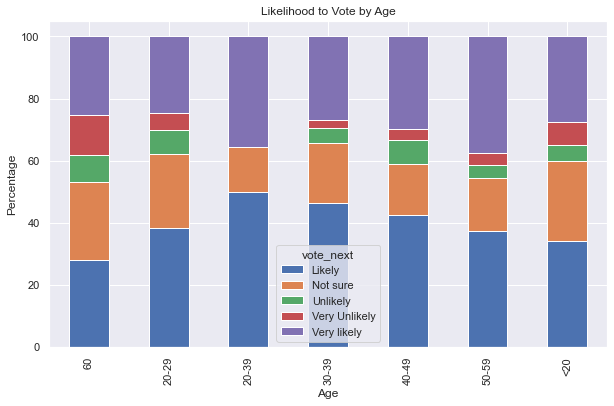

In [490]:
cross_tab_marital = pd.crosstab(df['Age'], df['vote_next'])

# Calculate the percentage of each likelihood category within each employment status group
cross_tab_percent = cross_tab_marital.apply(lambda x: x / x.sum() * 100, axis=1)

# Plot the cross-tabulation as a stacked bar chart
cross_tab_percent.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set plot labels and title
plt.xlabel('Age')
plt.ylabel('Percentage')
plt.title('Likelihood to Vote by Age')

# Show the plot
plt.show()

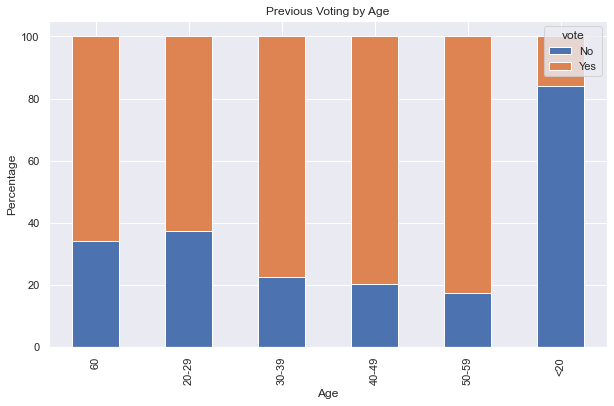

In [397]:
cross_tab_marital = pd.crosstab(df['Age'], df['vote'])

# Calculate the percentage of each likelihood category within each employment status group
cross_tab_percent = cross_tab_marital.apply(lambda x: x / x.sum() * 100, axis=1)

# Plot the cross-tabulation as a stacked bar chart
cross_tab_percent.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set plot labels and title
plt.xlabel('Age')
plt.ylabel('Percentage')
plt.title('Previous Voting by Age')

# Show the plot
plt.show()

In [491]:
from scipy.stats import chi2_contingency

# Assuming your data is stored in a DataFrame called 'df'

# Select the two categorical columns to correlate
column1 = 'Age'
column2 = 'vote_next'

# Create a contingency table of the two columns
contingency_table = pd.crosstab(df[column1], df[column2])

# Calculate the chi-square statistic and p-value
chi2, _, _, _ = chi2_contingency(contingency_table)

# Calculate the number of observations
n = len(df)

# Calculate Cramér's V
v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

# Print the correlation coefficient (Cramér's V)
print("Cramér's V:", v)

Cramér's V: 0.08972012675638388


In [492]:
from scipy.stats import chi2_contingency

# Assuming your data is stored in a DataFrame called 'df'

# Select the two categorical columns to correlate
column1 = 'Age'
column2 = 'vote'

# Create a contingency table of the two columns
contingency_table = pd.crosstab(df[column1], df[column2])

# Calculate the chi-square statistic and p-value
chi2, _, _, _ = chi2_contingency(contingency_table)

# Calculate the number of observations
n = len(df)

# Calculate Cramér's V
v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

# Print the correlation coefficient (Cramér's V)
print("Cramér's V:", v)

Cramér's V: 0.3752025852199584
